# Introduction to Financial Data Analysis with Python - v 2.0
## Author: Andrea Giussani
### Company: Cloud Academy

## Section 1: Dataset Creation

### 1.1 Data Reader

In this Section, we are going to cover the fundamentals concepts that are necessary to start out our analysis.
The data we wish to investigate are related to three stocks quoted in the NASDAQ 100 index, namely `Apple`, `Google` and `Facebook`, respectively. They are stored in three different `.csv` files.

Each of the above datasets contains different trading information on the observed stocks, identified by the column `Symbol`, consisting of:
 * the trading date, represented by `Date`;
 * the highest and lowest price observed in that trading session, represented by the column `High` and `Low` respectively;
 * the opening and closing price, represented by `Open` and `Close`;
 * and finally the observed `Volume` in each session.

Note that here we are dealing with the adjusted closing price. For the sake of completeness, please note that there is a little difference between the raw closing price and the adjusted closing price. The former is simply the cash value of that specific stock at the end of the trading day whereas the latter reflects the closing price of the stock in relation to other stock attributes. Hence, the adjusted is typically used as reference among traders and financial investors.

You are asked to import those datasets, using the most appropriate functions in `Pandas`, so that at the end you should have a single `pandas.DataFrame` object in memory containing the three sources.

**Hint**. Remember that typically a `csv` file is read using the `pd.read_csv()` function. In the course [`Data Wrangling with Pandas`](https://cloudacademy.com/course/data-wrangling-with-pandas-1089/course-introduction/?context_resource=lp&context_id=1988) we have covered a few methods to join different data sources. Here, you are asked to perform the concatenation by row. Which method is the most appropriate?

In [1]:
import pandas as pd

**Step 1**: Import the Apple data, and store them into a Python variable called `aapl_df`. <br>

In [2]:
aapl_df = pd.read_csv('data/AAPL.csv')

**Step 2**: Import the Google data, and store them into a Python variable called `googl_df`. <br>

In [3]:
googl_df = pd.read_csv('data/GOOGL.csv')

**Step 3**: Import the Facebook data, and store them into a Python variable called `fb_df`. <br>

In [4]:
fb_df = pd.read_csv('data/FB.csv')

**Step 4**: Concatenate the three `pandas.DataFfame` objects into a single variable, and call it `df_all`. 

In [5]:
df_all = pd.concat([aapl_df, googl_df, fb_df], axis=0)

**Step 5**: How many rows does the `df_all` have? And how many columns? 
Store the number of rows and columns inside the variables `rows` and `columns`, respectively.

In [6]:
df_all.shape

(567, 7)

In [7]:
rows=df_all.shape[0]
columns=df_all.shape[1]

In [8]:
assert rows==df_all.shape[0]
assert columns==df_all.shape[1]

**Step 6**: Inspect the first five rows of the `aapl_df`

In [9]:
aapl_df.head()

,Date,High,Low,Open,Volume,Close,Symbol
0,2020-01-02,75.150002,73.797501,74.059998,135480400.0,74.573036,AAPL
1,2020-01-03,75.144997,74.125000,74.287498,146322800.0,73.848030,AAPL
2,2020-01-06,74.989998,73.187500,73.447502,118387200.0,74.436470,AAPL
3,2020-01-07,75.224998,74.370003,74.959999,108872000.0,74.086395,AAPL
4,2020-01-08,76.110001,74.290001,74.290001,132079200.0,75.278160,AAPL


### 1.2 Basic Manipulations

Now, let us inspect the columns inside the `pandas.DataFrame`. Here, we are required to perform basic operations that allow us to change the type of the data under investigation.

**Step 1**. Print out the list of columns inside the object `df_all`.

In [10]:
print(list(df_all))

['Date', 'High', 'Low', 'Open', 'Volume', 'Close', 'Symbol']


**Step 2**. Applying the `.info()` method on the `df_all` results into a summary table containing information on the above columns. Tha has been run for you, and the output is shown below:

In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 188
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    567 non-null    object 
 1   High    567 non-null    float64
 2   Low     567 non-null    float64
 3   Open    567 non-null    float64
 4   Volume  567 non-null    float64
 5   Close   567 non-null    float64
 6   Symbol  567 non-null    object 
dtypes: float64(5), object(2)
memory usage: 35.4+ KB


**Step 3**. It is clear that the `Date` column is of type object. We wish to convert it into a `Datetime`.

Convert the `Date` columns using the pandas function `pd.DateTime`: this function simply converts a pandas series of type object into datetime. For more information, please check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

In [12]:
df_all['Date'] = df_all[['Date']].apply(lambda x: pd.to_datetime(x))

**Step 4**: check that the `Date` column is indeed a `Datetime` using the `.info()` method. If still you are getting `object` type, you must be sure you are applying the `pd.to_datetime()` correctly on the `df_all[['Date']]` dataframe object.

In [13]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 188
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    567 non-null    datetime64[ns]
 1   High    567 non-null    float64       
 2   Low     567 non-null    float64       
 3   Open    567 non-null    float64       
 4   Volume  567 non-null    float64       
 5   Close   567 non-null    float64       
 6   Symbol  567 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 35.4+ KB


In [14]:
assert df_all['Date'].dtypes == '<M8[ns]'

**Step 4**. Verify that there are just three distinct values for the column `Symbol`. Use the `drop_duplicates()` columns to do that. Store the result into the variable `distinct_elements`.

In [15]:
distinct_elements = df_all['Symbol'].drop_duplicates().count()

In [16]:
assert df_all['Symbol'].drop_duplicates().count() == 3

### 1.2.1 Plot the AAPL Series

You are asked now to plot the `AAPL` series using the `matplotlib` API. In particular, you have to filter out the `all_df` dataset by retaining just the AAPL close series.
Then, plot it with the following requirements:  <br>
* set the `figsize` to be equal to `(10,8)`. <br>
* use a dashed `linestyle`; <br>
* set the xlabel as `"Trading Day"`; <br>
* set the ylabel as `"Adj CLosing Price"`; <br>
* using the built-in context manager, change temporarily the plot style and set it as `ggplot`.

Before plotting the series, be sure  to set a new x-grid so that each new x-tick is shown every 15 trading days. Rotate the ticks labels by 30 degrees.

**Hint** To create a new grid, please use the `set_xticks()` methods applied on the axes object. As your reference, you might want to check the following [lecture](https://cloudacademy.com/course/data-visualization-with-python-using-matplotlib-1127/customization-in-matplotlib/) in our content library.

In [17]:
import matplotlib.pyplot as plt

**Step 1**: filter out the `df_all` by `AAPL`

In [18]:
appl_series = df_all.query("Symbol=='AAPL'")

**Step 2**: create new x-ticks.

This is an advanced part, so it requires a little bit of introduction for you. You will be asked to use to advanced `pandas` functions, namely `pd.DateOffset`, which is used to create a grid of dates inside the `pd.date_range()`, which actually creates a fixed frequency DatetimeIndex. For more information, please visit the official documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html).

To facilitate your work, the following snippet has been prefilled for you:

In [19]:
my_dates = list(
    pd.date_range(
        start=appl_series['Date'].min(),
        end=appl_series['Date'].max() + pd.DateOffset(1),
        freq=pd.offsets.Day(15))
)
my_datetimes = [pd.to_datetime(elem).date() for elem in my_dates]

**Step 3**: plot the plain series with `figsize=[10,8]`

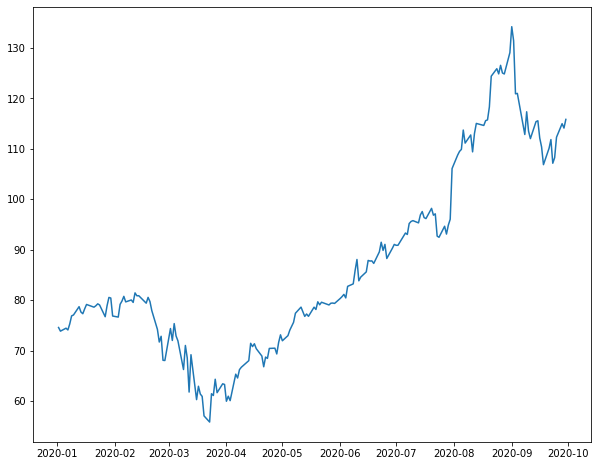

In [20]:
fig, ax = plt.subplots(figsize=[10,8])
ax.plot(appl_series['Date'], appl_series['Close'])
plt.show()

**Step 4**: use a dashed `linestyle` 

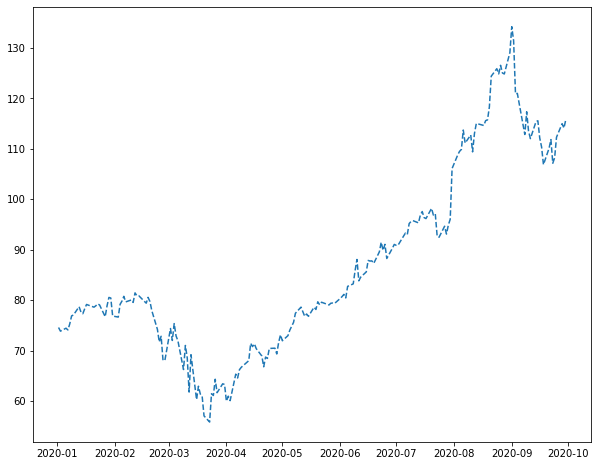

In [21]:
fig, ax = plt.subplots(figsize=[10,8])
ax.plot(appl_series['Date'], appl_series['Close'], linestyle='--')
plt.show()

**Step 5**: add both `x-label` and `y-label` 

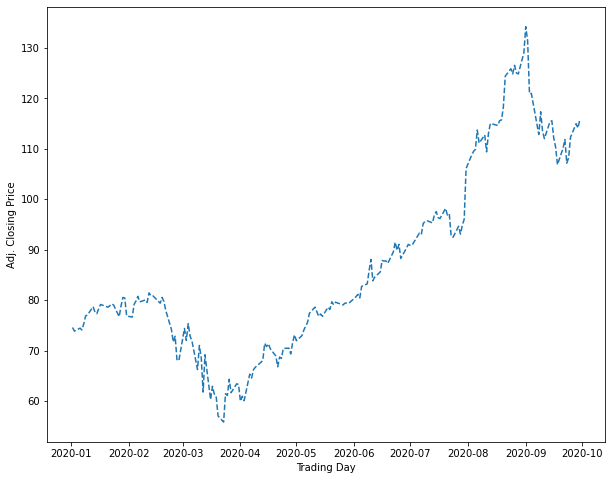

In [22]:
fig, ax = plt.subplots(figsize=[10,8])
ax.plot(appl_series['Date'], appl_series['Close'], linestyle='--')
ax.set_xlabel('Trading Day')
ax.set_ylabel('Adj. Closing Price')
plt.show()

**Step 6**: change `x-ticks` using the most appropriate methods 

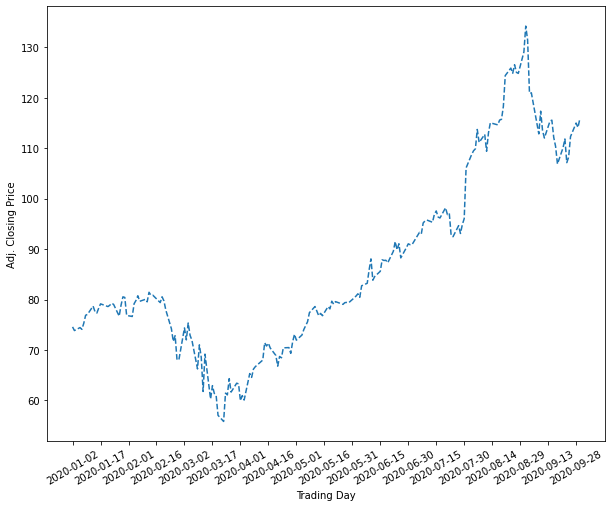

In [23]:
fig, ax = plt.subplots(figsize=[10,8])
ax.plot(appl_series['Date'], appl_series['Close'], linestyle='--')
ax.set_xticks(my_datetimes)
ax.set_xticklabels(my_datetimes, rotation=30)
ax.set_xlabel('Trading Day')
ax.set_ylabel('Adj. Closing Price')
plt.show()

**Step 7**: use the `ggplot` style just for this plot

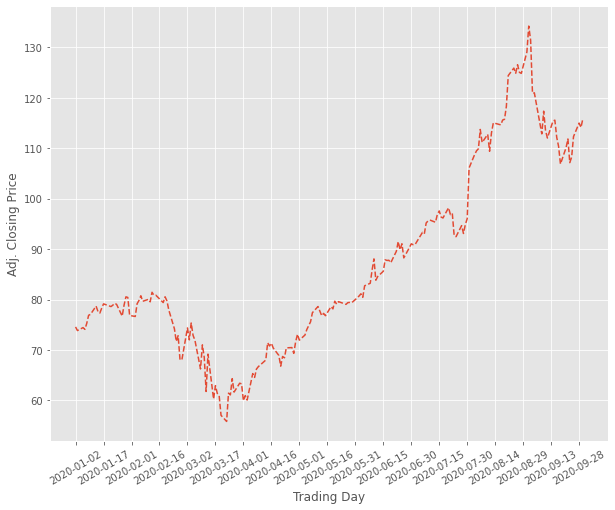

In [24]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=[10,8])
    ax.plot(appl_series['Date'], appl_series['Close'], linestyle='--')
    ax.set_xticks(my_datetimes)
    ax.set_xticklabels(my_datetimes, rotation=30)
    ax.set_xlabel('Trading Day')
    ax.set_ylabel('Adj. Closing Price')
    plt.show()
    

### 2 Data Transformation and Aggregation

### 2.1 Data Transformation

The dataset stored in `df_all` is a tidy dataset. We now want to perform aggregating operations with respect to the `Close` price column, say creating a new `pandas.DataFrame` object containing as index the `Date` and as columns the `Stock`. How would you perform this operation?

It might be useful to use the `pivot()` method: that requires three arguments:
 - `index`: the column we wish to have as index of the new dataframe - in this case `Date`; <br>
 - `columns`: the column we wish to have as columns of the new dataframe - in this case `Symbol`; <br>
 - `values`: the column we wish to have as values of the new dataframe - in this case `Close`. <br>
 
Store the result into te object `pivot_close`. At the end, we sort the index using the `sort_index()` method so that we are sure the index is correctly set. At the end, print out the first five rows of the resulting `pivot_close` dataframe by applying `head()` on it.

To get more insights about this method, as well as other ways to reach the same result, please check this [lecture](https://cloudacademy.com/course/data-wrangling-with-pandas-1089/transformation-of-a-dataset/?context_resource=lp&context_id=1988) from the course `Data wrangling with Pandas`.

In [25]:
pivot_close = df_all.pivot(
    index='Date',
    columns='Symbol',
    values='Close'
).sort_index()

In [26]:
pivot_close.head()

Symbol,AAPL,FB,GOOGL
Date,,,
2020-01-02,74.573036,209.779999,1368.680054
2020-01-03,73.848030,208.669998,1361.520020
2020-01-06,74.436470,212.600006,1397.810059
2020-01-07,74.086395,213.059998,1395.109985
2020-01-08,75.278160,215.220001,1405.040039


In [27]:
assert list(pivot_close) == ['AAPL', 'FB', 'GOOGL']

For the sake of completeness, please note that the same result could have been obtained in the following fashion:

In [28]:
alternative_pivoting = df_all[
    ['Close','Symbol', 'Date']
].drop_duplicates().groupby(['Date', 'Symbol']).mean()['Close'].unstack()

In [29]:
alternative_pivoting.head()

Symbol,AAPL,FB,GOOGL
Date,,,
2020-01-02,74.573036,209.779999,1368.680054
2020-01-03,73.848030,208.669998,1361.520020
2020-01-06,74.436470,212.600006,1397.810059
2020-01-07,74.086395,213.059998,1395.109985
2020-01-08,75.278160,215.220001,1405.040039


### 2.2 Data Aggregation: compute the mean price observed 

Using the `pivot()` function is fine for transforming the row dataset but not for aggregation. For that, we typically use the `pivot_table()` method. In this exercise, you are asked to aggregate the raw data into the average price observed from Jan 01, 2020 to Sept 30, 2020 for the three stocks. Be sure to print the aggregated dataframe out as your final step of this operation.

In [30]:
mean_close = df_all.pivot_table(
    index='Symbol',
    values='Close',
    aggfunc='mean'
).sort_index()

In [31]:
print(mean_close)

              Close
Symbol             
AAPL      86.674529
FB       221.144868
GOOGL   1410.082332


In [32]:
assert round(mean_close.iloc[2].values[0]) == 1410

### 2.3 Data Aggregation: compute the median price and the max volume observed

You are now asked to performed an aggregation on two different columns.
Remember that you can pass a list of `values` to the `pivot_table()` and that the `aggfunc` can be passed as a dictionary, where each key represents the column we wish to aggregate, and its value is nothing more that the aggregating function. Store the result into the object `agg_close_volume`.

In [33]:
agg_close_volume = df_all.pivot_table(
    index='Symbol',
    values=['Close', 'Volume'],
    aggfunc={'Volume':'max', 'Close':'median'}
).sort_index()

In [34]:
agg_close_volume

,Close,Volume
Symbol,,
AAPL,79.811897,426884800.0
FB,221.770004,76343900.0
GOOGL,1439.250000,5417900.0


In [35]:
assert round(agg_close_volume.iloc[0]['Volume']) == 426884800

### 2.4  Monthly Average Closing Price

Suppose now we are interested in getting the average closing price observed for each single stock. <br>
This can be easily performed in different ways: one of the easiest one is to employ the `.groupby()` method. 

#### Option 1: using the `groupby()` method

In this scenario, we have to perform a little bit of data wrangling as follows:

**Step 1**: create a new `pandas.DataFrame` object, called `filtered_appl_df`, by slicing the `df_all` with `['Date','Close']` and by retaining just the `AAPL` stock observations.

In [36]:
filtered_appl_df = df_all[df_all["Symbol"]=='AAPL'][['Date','Close']]

**Step 2**:  add to the `filtered_appl_df` a new column, called `Month`, which represents the month we have observed the statistical observation. To do that, apply the pandas function `DatetimeIndex` to `df_all['Date']`, and store to the new column only the attribute `month`.

In [37]:
filtered_appl_df['Month'] = pd.DatetimeIndex(filtered_appl_df['Date']).month 

**Step 3**: drop the `Date` column from the `filtered_appl_df` pandas object

In [38]:
filtered_appl_df.drop(['Date'], axis=1, inplace=True)

**Step 4**: after having applied the `groupby()` on the `Month` column, apply the `.mean()` function to get the monthly average closing price.

In [39]:
filtered_appl_df.groupby('Month').mean().rename(columns={'Close':'Average Close Price'})

,Average Close Price
Month,
1,77.444766
2,77.428357
3,65.316130
4,67.790483
5,77.306906
6,86.295997
7,95.394253
8,117.261832
9,115.125237


#### Option 2: using the `resample` method

A very useful method in `pandas` to perform the above operations is with the `.resample()` function: this permits you to resample the data so that the time series is at a monthly level.

The `.resample()` function is often used because it allows, with just one line of code, to perform complex data wrangling operations, as well as it provides greater flexibility over frequency conversion of time series.

To do so, we need to:
* set `Date` as index of a new pandas object, that we call `new_filtered_appl_df`;
* applying the `.resample()` function on the `Close` column from the `new_filtered_appl_df`, by specifying the interval size of the resample function - in this case the level will be set to month, denoted by the string `'M'`;
* we then apply the `.mean()` function on the resulting object.

In [40]:
new_filtered_appl_df = df_all.set_index('Date')
df_resampled = new_filtered_appl_df[['Close']].resample('M').mean()
df_resampled

,Close
Date,
2020-01-31,576.749209
2020-02-29,582.595765
2020-03-31,472.069015
2020-04-30,491.635084
2020-05-31,558.409472
2020-06-30,583.312608
2020-07-31,616.641268
2020-08-31,643.689025
2020-09-30,631.059840


## 3 Data Comparison with respect to Quantitative Transformation

Daily returns are defined as percentage change in the observed price. In mathematical terms, are defined as follows:
$$ R_t = \frac{P_{t}}{P_{t-1}}-1 $$
If you have attended the `Data Wrangling with Pandas` course, this concept should be familiar to you. If not, do not worry: it is sufficient to know that daily returns are used to better evaluate any investment (compared to simple difference in price). Below we report a method that basically computes simple returns.

In [41]:
def daily_change(row): 
    return row.pct_change()

Note that we can compute explicitly them using the `.shift()` method, and that this is preferred form a practical point of view, since most of the times, financial returns are computed as log-returns. Mathematically,

$$ log(R_t) = \log(P_{t}) - log(P_{t-1}) $$

You are asked to compute the log returns, and store the result in a `pandas.DataFrame` object.

**Step 1**: Compute the simple returns using the given method `def daily_change_shift()`. Store the results into the `daily_returns` object.

In [42]:
def daily_change_shift(row):
    return row / row.shift(1) - 1

In [43]:
daily_returns = pivot_close.apply(lambda x: daily_change_shift(x))

Basically, this is the same of applying, for each Symbol, the following syntax: for example,
```python
df_all[df_all['Symbol']=='AAPL']['Close'] / df_all[df_all['Symbol']=='AAPL']['Close'].shift(1) - 1
```

**Step 2**: Compute the log returns.

We use `numpy` to compute the logarithm of the above quantity. We therefore  `import numpy as np` and then use the `np.log()` method on the daily observed price. This has been done for you.

Apply the `daily_log_change_shift()` on the `pivot_close` dataframe, and store the result into the `log_daily_returns` object.

In [44]:
import numpy as np
def daily_log_change_shift(row):
    return np.log(row) - np.log(row.shift(1)) - 1

In [45]:
log_daily_returns = pivot_close.apply(lambda x: daily_log_change_shift(x))

**Step 3**: Show the first five rows of the `log_daily_returns` dataframe object

In [46]:
log_daily_returns.head()

Symbol,AAPL,FB,GOOGL
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-1.009770,-1.005305,-1.005245
2020-01-06,-0.992063,-0.981342,-0.973695
2020-01-07,-1.004714,-0.997839,-1.001934
2020-01-08,-0.984042,-0.989913,-0.992907


In [47]:
assert round(log_daily_returns.iloc[1,0], 4) == -1.0098

### 3.1 Plot the Returns using a Histogram

Here you are asked to plot the returns using two kind of plots we have covered during the course `Data Visualization with Python using Matplotlib`, namely histograms and line plots.

First of all, you are asked to provide a visual representation of the distribution of the `AAPL` returns. To do that, we employ a histogram. In matplotlib, we use the function `hist()` applied on the axes object. 

**Step 1**: create a hitogram by calling `plt.subplots()` with `figsize` argument equal to `(10,8)`. Then: 

* apply on the `ax` object the `hist()` function, by specifying the arguments `label` equal to `AAPL Stock Returns`, and `bins` equal to 10. Recall that you need to pass, as firt argument, the `daily_returns['AAPL']` object.
* Set the `xlabel` as `Returns` and `y_label` as `N. observations`. 
* Add a legend, before calling `plt.show()`, by specifying `loc='upper left'`.

* wrap everything into a context manager so that the `seaborn` style is applied only on this figure.

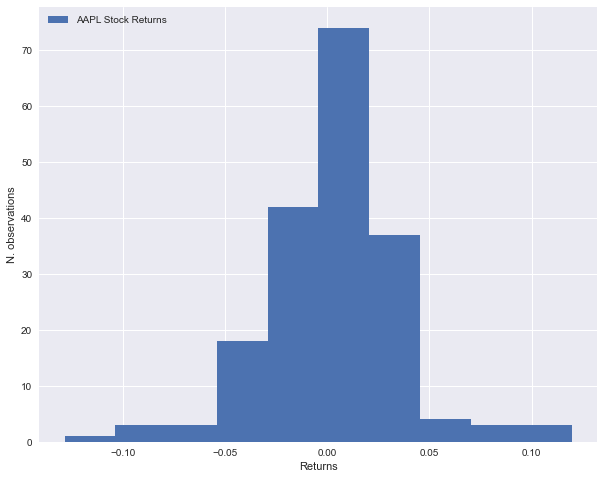

In [48]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize=[10,8])
    ax.hist(daily_returns['AAPL'], label='AAPL Stock Returns', bins=10)
    ax.set_xlabel('Returns')
    ax.set_ylabel('N. observations')
    ax.legend(loc='upper left')
    plt.show()

Alternatively, we can plot the series over time, as follows:<br>

 - instead of `hist()`, use the `plot()` method on the `ax` object. Remember that now you need to pass as `x` argument the `daily_returns.index` and as `y`  `daily_returns['AAPL']`. No `bins` are required here; <br>
 
 - to get a better readability of the plot, apply on the `ax` object: `set_xlabel('Time')`, `set_ylabel('Daily Returns')` and set also a title with font size equal to 15 and title euqal to `Daily Returns AAPL`;<br>
 
 - finally, apply on the `ax` object the `set_xticks()` method by passing the `my_datetimes` list (we have generated them in Section 2), and rotate the axis by 30 degree using the most appropriate method.

Remember to add a context manager to apply the `seaborn` stlye on this figure.

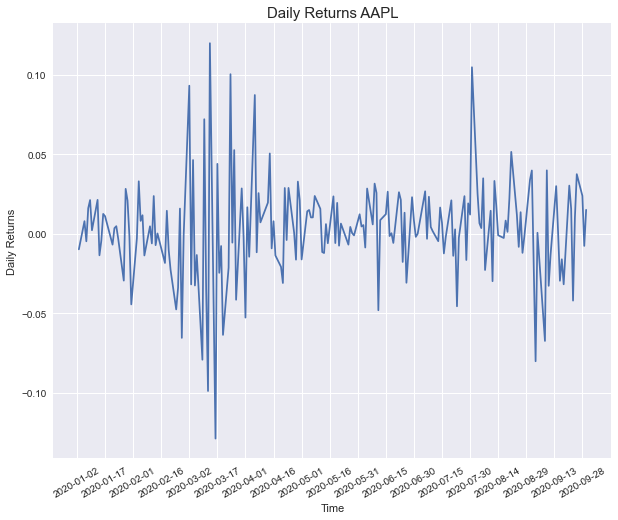

In [49]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize=[10,8])
    ax.plot(daily_returns.index, daily_returns['AAPL'], label='daily returns') 
    ax.set_xlabel('Time')
    ax.set_ylabel('Daily Returns')
    ax.set_title('Daily Returns AAPL', fontdict={'size':15})
    ax.set_xticks(my_datetimes)
    ax.set_xticklabels(my_datetimes, rotation=30)
    plt.show()

### 3.2 Daily Cumulative Returns

Daily returns are fine but sometimes we would like to know how the current investment is performing in a larger time window, say a month. To measure this, a different metric is used in practice. The cumulative daily rate of return is useful to determine the value of an investment at regular intervals. You can calculate the cumulative daily rate of return starting from the daily returns, using the following method:

In [50]:
def daily_cum_returns(row):
    return (row + 1).cumprod()

**Step 1**: compute the cumulative returns by applying the custom function provided for you: you need to apply to the `daily_returns` dataframe the function `daily_cum_returns`. This will compute the cumulative returns for each trading day. Store the resulting dataframe into the object `cum_daily_returns`, and show its first five rows.

In [51]:
cum_daily_returns = daily_returns.apply(lambda x: daily_cum_returns(x))

In [52]:
cum_daily_returns.head()

Symbol,AAPL,FB,GOOGL
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,0.990278,0.994709,0.994769
2020-01-06,0.998169,1.013443,1.021283
2020-01-07,0.993474,1.015635,1.019311
2020-01-08,1.009455,1.025932,1.026566


**Step 2** Plot the results. Fisrt, change the ticks so that a string (instead of a datetime) is shown. This is done for you.

In [53]:
ticks_to_use = cum_daily_returns.index[::30]
labels = [ i.strftime("%B-%d") for i in ticks_to_use ]

**Step 3** Using the seaborn style as context, plot the `cum_daily_returns` for AAPL. Applt on the `ax` object the method `plot()`, taking care of the `label` defined as `cumulative returns`. Set the figseize as `(15,10)`.

Then:
* apply `set_xlabel('Time')` on the `ax` object;
* apply `set_ylabel('Cum Returns')` on the `ax` object;
* apply `set_xticks(ticks_to_use)` on the `ax` object;
* apply `set_xticklabels(labels, rotation=30)` on the `ax` object;
* apply `set_title('Cumulative Returns')` on the `ax` object.
 
Remeber to to use the `ggplot` style.

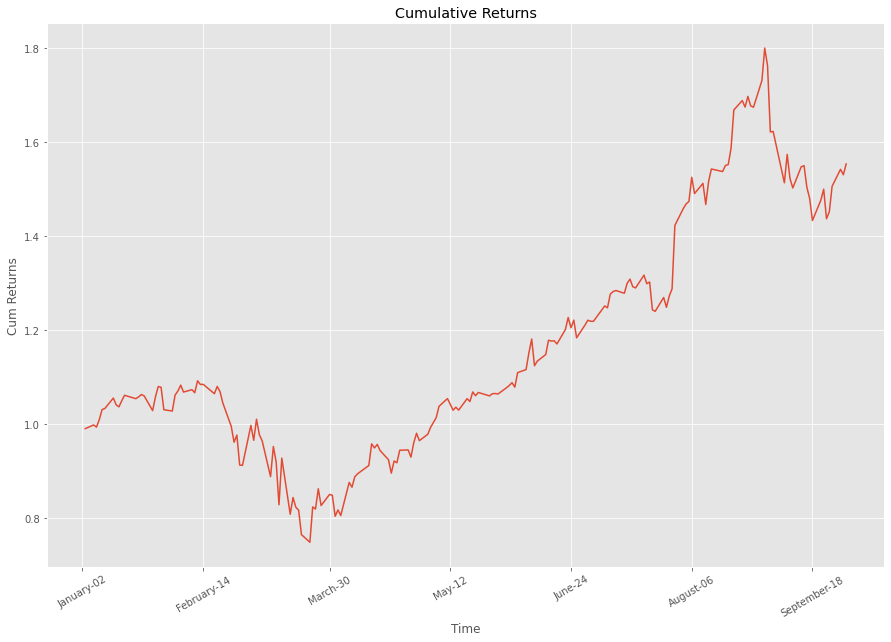

In [54]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=[15,10])
    ax.plot(cum_daily_returns.index, cum_daily_returns['AAPL'], label='cumulative returns') 
    ax.set_xlabel('Time')
    ax.set_ylabel('Cum Returns')
    ax.set_xticks(ticks_to_use)
    ax.set_xticklabels(labels, rotation=30)
    ax.set_title('Cumulative Returns')
    plt.show()

### 3.3 Multiple Plots 

We now plot the cumulative returns for `AAPL`, `FB` and `GGOGL` in the same plot. To do so, we apply on the `ax` object the `plot()` method as many times as the number of stocks we wish to plot - in this case three.

Remmeber that each single call of the `plot()` requires `cum_daily_returns.index` as the `x` argument, and the `cum_daily_returns['<SYMBOL_HERE>']` as y, where `<SYMBOL_HERE>` is just a placeholder for the `Symbol` we wish to plot - e.g. `AAPL`.

Then:
* apply `set_xlabel('Time')` on the `ax` object;
* apply `set_ylabel('Cum Returns')` on the `ax` object;
* apply `set_xticks(ticks_to_use)` on the `ax` object;
* apply `set_xticklabels(labels, rotation=30)` on the `ax` object;
* apply `set_title('Cumulative Returns', fontdict={'size':15})` on the `ax` object.
 
Remeber to add a legend with location `upper left` and to use the `ggplot` style.

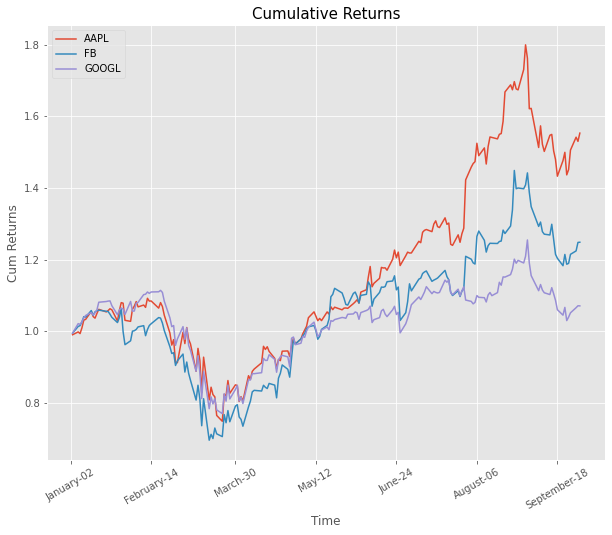

In [55]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=[10,8])
    ax.plot(cum_daily_returns.index, cum_daily_returns['AAPL'], label='AAPL') 
    ax.plot(cum_daily_returns.index, cum_daily_returns['FB'], label='FB') 
    ax.plot(cum_daily_returns.index, cum_daily_returns['GOOGL'], label='GOOGL') 
    ax.set_xlabel('Time')
    ax.set_ylabel('Cum Returns')
    ax.set_xticks(ticks_to_use)
    ax.set_xticklabels(labels, rotation=30)
    ax.set_title('Cumulative Returns', fontdict={'size':15})
    ax.legend(loc='upper left')
    plt.show()

### 3.4 Adding Annotations
Sometimes, it is good to add more information on the figure. For instance, we might want to enrich the figure with a few information related to the phenomenon under investigation. In this case, we might want to highlight two important facts: at the beginning of March 2020, most of the European countries were facing ever increasing numbers of infected with covid-19. The threath of an impendings lockdowns caused a significant drop in the main indexes. We would like to annotate this event in the above figure.

Furthermore, it is clear that at the end oj July 2020, a positive event affected to AAPL stock price. Indeed, the Q2 2020 results went out, and were the best ever observed for the Cupertino's company. We would like to highlight this event as well in the plot.

We would like to add those textual information inside the plot.

**Hint** Typically, annotation are applied on the axes object with the method `.annotate()`. If you want to refresh your memory on this concept, please check the following [lecture](https://cloudacademy.com/course/data-visualization-with-python-using-matplotlib-1127/annotating-text-with-matplotlib/) out.

**Step 1**:  take the pre-filled code below this cell, and add the annotation `"European Lockdowns caused by SARS-COVID-19"` with arguments:
 - `xy` equal to `[cum_daily_returns.index[40], 1.1]`, standing for the point on the cartesian plan where the event occurred.
 - `xytext` equal to `([cum_daily_returns.index[10],, 1.4)`, standing for the point on the cartesian plan where we wish to display the text;
 - `fontsize` equal to 10;
 - `weight` argument equal to `'bold'` to highlight the text;
 - `arrowprops` argument equal to `{'arrowstyle':'->', 'color': 'black', 'linestyle':'--'}`

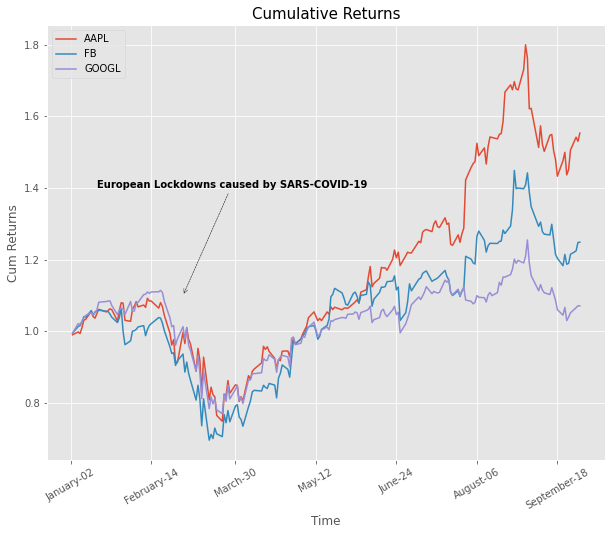

In [56]:

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=[10,8])
    ax.plot(cum_daily_returns.index, cum_daily_returns['AAPL'], label='AAPL') 
    ax.plot(cum_daily_returns.index, cum_daily_returns['FB'], label='FB') 
    ax.plot(cum_daily_returns.index, cum_daily_returns['GOOGL'], label='GOOGL') 
    ax.set_xlabel('Time')
    ax.set_ylabel('Cum Returns')
    ax.set_xticks(ticks_to_use)
    ax.set_xticklabels(labels, rotation=30)
    ax.set_title('Cumulative Returns', fontdict={'size':15})
    ax.legend(loc='upper left')
    
    ## START 
    ## TO BE FILLED BY STUDENT
    ax.annotate(
        "European Lockdowns caused by SARS-COVID-19",
        xy = [cum_daily_returns.index[40], 1.1],
        xytext=(cum_daily_returns.index[10], 1.4), 
        fontsize=10,
        weight='bold',
        arrowprops={'arrowstyle':'->', 'color': 'black', 'linestyle':'--'}
    )
    ## END
    
    plt.show()

**Step 2**:  add an extra annotation for the Q2-2020 Apple Results defined as `"Q2-2020 results"`. In particular:
 - `xy` equal to `[cum_daily_returns.index[145], 1.27]`, standing for the point on the cartesian plan where the event occurred.
 - `xytext` equal to `([cum_daily_returns.index[100],, 1.6)`, standing for the point on the cartesian plan where we wish to display the text;
 - `fontsize` equal to 12;
 - `weight` argument equal to `'bold'` to highlight the text;
 - `arrowprops` argument equal to `{'arrowstyle':'->', 'color': 'black', 'linestyle':'--'}`

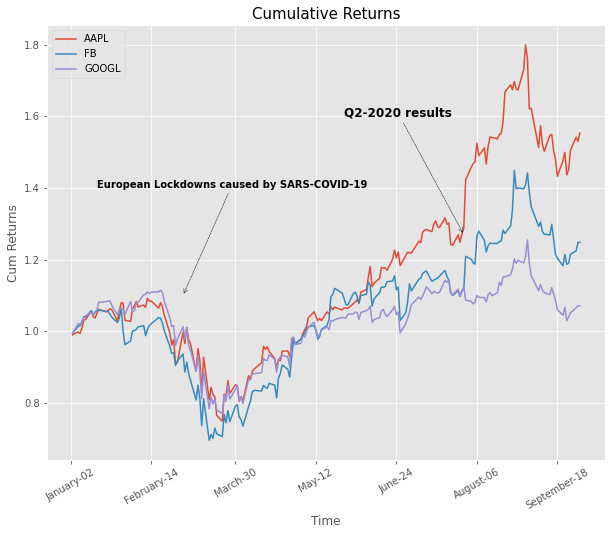

In [57]:

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=[10,8])
    ax.plot(cum_daily_returns.index, cum_daily_returns['AAPL'], label='AAPL') 
    ax.plot(cum_daily_returns.index, cum_daily_returns['FB'], label='FB') 
    ax.plot(cum_daily_returns.index, cum_daily_returns['GOOGL'], label='GOOGL') 
    ax.set_xlabel('Time')
    ax.set_ylabel('Cum Returns')
    ax.set_xticks(ticks_to_use)
    ax.set_xticklabels(labels, rotation=30)
    ax.set_title('Cumulative Returns', fontdict={'size':15})
    ax.legend(loc='upper left')
    
    ax.annotate(
        "European Lockdowns caused by SARS-COVID-19",
        xy = [cum_daily_returns.index[40], 1.1],
        xytext=(cum_daily_returns.index[10], 1.4), 
        fontsize=10,
        weight='bold',
        arrowprops={'arrowstyle':'->', 'color': 'black', 'linestyle':'--'}
    )
    
    ## START 
    ## TO BE FILLED BY STUDENT
    ax.annotate(
        "Q2-2020 results",
        xy = [cum_daily_returns.index[145], 1.27],
        xytext=(cum_daily_returns.index[100], 1.6), 
        fontsize=12,
        weight='bold',
        arrowprops={'arrowstyle':'->', 'color': 'black', 'linestyle':'--'}
    )
    ## END
    
    plt.show()

# END 